#The Zero (DC) Component 

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


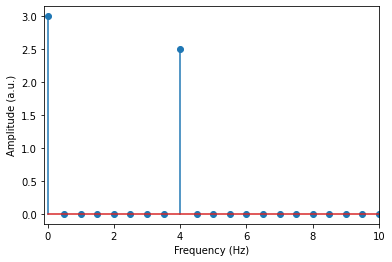

In [4]:
 ## incorrect DC reconstruction without careful normalization

# create the signal
srate  = 1000 # hz
time   = np.arange(0.,2.,1/srate) # time vector in seconds
pnts   = len(time) # number of time points
signal =  1.5 + 2.5*np.sin( 2*np.pi*4*time )


# prepare the Fourier transform
fourTime = np.array(range(0,pnts))/pnts
fCoefs   = np.zeros(len(signal),dtype=complex)

for fi in range(0,pnts):
    # create complex sine wave and compute dot product with signal
    csw = np.exp( -1j*2*np.pi*fi*fourTime )
    fCoefs[fi] = np.sum( np.multiply(signal,csw) )


# extract amplitudes
ampls = 2*np.abs(fCoefs/pnts); #Error
#Doubling the Zero Commonent too. There is nothing like -0 or +0. It doesn't gets splitted.

# compute frequencies vector
hz = np.linspace(0,srate/2,num=math.floor(pnts/2.)+1)

plt.stem(hz,ampls[0:len(hz)])
plt.xlim(-.1,10)
plt.xlabel('Frequency (Hz)'), plt.ylabel('Amplitude (a.u.)')
plt.show()


Incorrect DC value due to lack of normalization. It is 3, which we specified 1.5.

#Applying Normalization

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


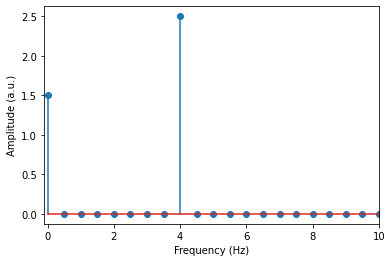

In [5]:
# create the signal
srate  = 1000 # hz
time   = np.arange(0.,2.,1/srate) # time vector in seconds
pnts   = len(time) # number of time points
signal =  1.5 + 2.5*np.sin( 2*np.pi*4*time )


# prepare the Fourier transform
fourTime = np.array(range(0,pnts))/pnts
fCoefs   = np.zeros(len(signal),dtype=complex)

for fi in range(0,pnts):
    # create complex sine wave and compute dot product with signal
    csw = np.exp( -1j*2*np.pi*fi*fourTime )
    fCoefs[fi] = np.sum( np.multiply(signal,csw) )


# extract amplitudes (Correct Way)
ampls = np.abs(fCoefs/pnts)
ampls[2:len(hz)] = 2*ampls[2: len(hz)] #doubled the Positive frequencies only.

# compute frequencies vector
hz = np.linspace(0,srate/2,num=math.floor(pnts/2.)+1)

plt.stem(hz,ampls[0:len(hz)])
plt.xlim(-.1,10)
plt.xlabel('Frequency (Hz)'), plt.ylabel('Amplitude (a.u.)')
plt.show()

Expected Output.